# Estudo de Regressão Linear

* A ideia central é pegar um conjunto de dados que possuem uma ou mais variáveis independentes (features) ($x_i, i=1,\dots, N$) e uma variável dependente (targets) ($y_i, i=1,\dots,N$). A partir desse dataset, encontrar uma regressão linear que melhor se encaixe no conjunto de dados.

* Como fazer isso? 
    - Primeiro tomamos uma hipótese do tipo: $h(X, w) = \sum_n w_n\cdot x_n$, onde $x_n$ são as variáveis independentes e $w_n$ são parâmetros (bias) para a nossa regressão. Normalmente, considera-se $w_0$ como o intercepto do eixo $y$.
    - Assim, ajusta-se os parâmetros $w_n$ para minimizar o erro entre as previsões do modelo e os valores reais. Para isso, cria-se uma função de custo (**Erro Quadrático Médio**) baseada nestes parâmetros: $$J(w_0, w_1) = \frac{1}{2N} \sum_{i=1}^N (h(x_i, w) - y_i)^2,$$ onde $N$ é o tamanho do nosso dataset e $y_i$ é o target da variável independente $x_i$.
    - Por fim, minimiza-se a função de custo em relação aos parâmetros escolhidos, isto é, a primeira derivada parcial:

## Gerando um Dataset a partir do sklearn

In [112]:
import sklearn

from sklearn.datasets import make_regression

X, y = make_regression(n_samples=200, n_features=1, n_targets=1, n_informative=1, noise=6, bias=30, random_state=200)
N = 200

* Aqui, **make_regression** é utilizado para criar um conjunto de dados.
    - n_samples: o número de amostras;
    - n_features: o número de variáveis independentes ($x$);
    - n_informative: o número de variáveis independentes que entrarão no modelo linear;
    - n_targets: o número de resultados esperados pela regressão, o valor de $y_i$ associado a $x_i$;
    - bias: parâmetros do modelo;
    - Desvios do erro Gaussiano aplicado ao conjunto de dados;

* Note que, no exemplo usado, **noise** está baixo para compensar **random_state** alto, ou seja, a geração de dados aleatórias está alta e, portanto, precisamos de baixo ruído. Caso contrário, por padrão, poderíamos deixar random_state=42 e aumentar o ruído para compensar.

## Visualizando o dataset com Matplotlib

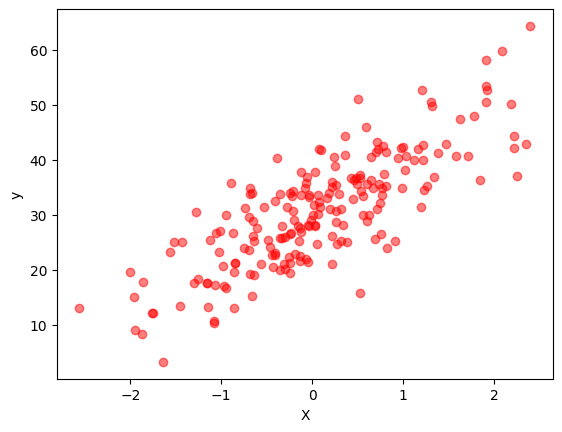

In [113]:
from matplotlib import pyplot as plt

plt.scatter(X, y, c="red", alpha=.5, marker='o')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

## Modelo Linear - Hipótese

In [114]:
import numpy as np

def h(X, w):
    return w[1]*np.array(X[:,0]) + w[0]

## Função de Custo

In [115]:
def cost(X, y, w):
    return (1/(2*N)) * sum(np.square(h(X, w) - np.array(y)))

## Gradient Descent

* Derivada parcial em relação aos parâmetros de otimização

In [116]:
def grad(X, y, w):
    dj_dw0 = (1/N) * sum(h(X, w) - np.array(y))
    dj_dw1 = (1/N) * sum((h(X, w) - np.array(y)) * np.array(X[:,0]))
    return np.array([dj_dw0, dj_dw1])

**learning rate (lr)** $=\alpha$

In [117]:
def descent(w_new, w_prev, lr):
    print(w_prev)
    print(cost(X, y, w_prev))
    j=0
    
    while True:
        w_prev = w_new
        w0 = w_prev[0] - lr * grad(X, y, w_prev)[0]
        w1 = w_prev[1] - lr * grad(X, y, w_prev)[1]
        w_new = [w0, w1]

        print(w_new)
        print(cost(X, y, w_new))

        if (w_new[0]-w_prev[0])**2 + (w_new[1]-w_prev[1])**2 <= 1e-6:
            return w_new
        if j>500:
            return w_new
        j+=1
        

In [118]:
w_prev = [0, -1]

In [119]:
w = descent(w_prev, w_prev, 0.1)
print(w)

[0, -1]
540.5360663843459
[3.095630863344754, 0.11442770988081796]
437.9113933642844
[5.873446610978821, 1.102345428138287]
355.5039050187039
[8.366165526017987, 1.977865778324762]
289.3267499184996
[10.603129563187093, 2.7535473249589413]
236.17997507457181
[12.610653489037027, 3.44056402638543]
193.49509649539317
[14.412337853388406, 4.04885635145409]
159.21039019959102
[16.029349544653595, 4.587266032213947]
131.67082846689087
[17.48067329182008, 5.063656213710699]
109.54778810165583
[18.783337126559395, 5.485018573380516]
91.77462156224568
[19.95261450593569, 5.857568814053482]
77.4949550830467
[21.002205515744063, 6.186831784078627]
66.02119816099956
[21.944399323224104, 6.477717343647051]
56.80124628992387
[22.790219822732876, 6.734587976310906]
49.391757899647274
[23.54955621620599, 6.9613190374459215]
43.436706577550595
[24.231280089449346, 7.161352435618198]
38.650166444244846
[24.843350383306014, 7.337744457271139]
34.80249455533613
[25.392907513577818, 7.493208368754657]
31.

## Visualizando os resultados

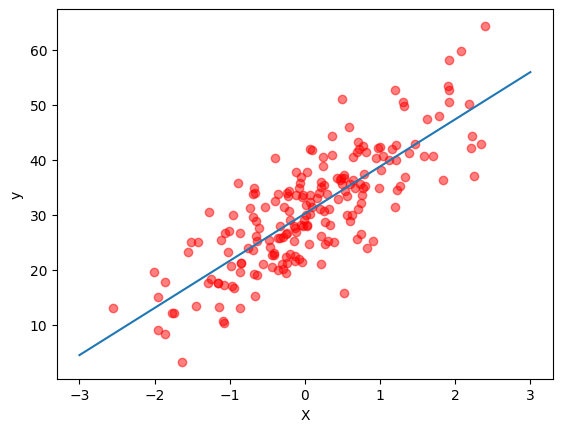

In [122]:
def graph(formula, x_range):
    x = np.array(x_range)
    y = formula(x)
    plt.plot(x, y)

def my_formula(x):
    return w[1]*x + w[0]

plt.scatter(X, y, c="red", alpha=.5, marker='o')
graph(my_formula, range(-3, 4))
plt.xlabel("X")
plt.ylabel("y")
plt.show()


# Regressão Linear a partir do Sklearn

* A biblioteca sklearn constrói a melhor reta de forma a minimizar a **soma dos erros ao quadrado** em relação aos dados.

In [16]:
import numpy as np
import sklearn
import pandas as pd

from sklearn.linear_model import LinearRegression

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

* Utilizando o dataset de casas da Califórinia

In [4]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

In [5]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [13]:
casas = pd.DataFrame(data.data)
casas.columns = data.feature_names
casas['MedHouseVal'] = data.target

casas

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


* Regressão Linear simples
    - Relaciona uma única coluna com o target

In [14]:
x = casas.MedInc # feature
y = casas.MedHouseVal # target

In [28]:
# Separando os dados em treino e teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [29]:
# Criando o regressor
reg = LinearRegression().fit(np.array(x_train).reshape(-1,1), y_train)

In [30]:
# Avaliando o erro
y_pred = reg.predict(np.array(x_test).reshape(-1,1))

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Absolute Error: 0.6265986453094173
Mean Squared Error: 0.7028461448540976


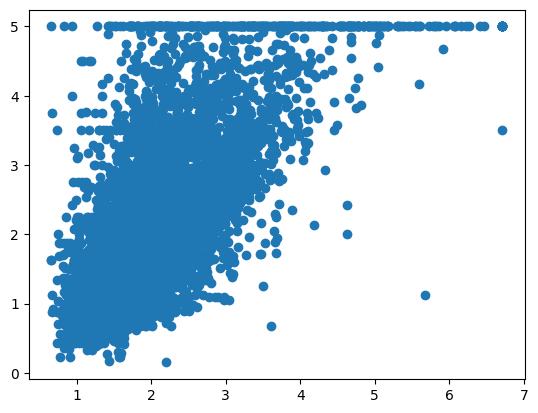

In [34]:
# Visualizando graficamente a relação entre dados previstos e reais
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(y_pred, y_test)

* Regressão Linear Múltipla

* Apenas duas variáveis

In [39]:
x = casas[['MedInc', 'AveBedrms']] # features
y = casas.MedHouseVal # target

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [42]:
reg = LinearRegression().fit(x_train, y_train)

In [44]:
reg.coef_

array([0.41732849, 0.00059442])

In [45]:
reg.intercept_

0.44810749063254973

In [43]:
# Avaliando o erro
y_pred = reg.predict(x_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Absolute Error: 0.6266005452778879
Mean Squared Error: 0.7028544349993665


* Mais de duas variáveis (colunas)

In [46]:
x = casas.drop(columns=['MedHouseVal'], axis=1) # features
y = casas.MedHouseVal # target

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [48]:
reg = LinearRegression().fit(x_train, y_train)

In [49]:
# Avaliando o erro
y_pred = reg.predict(x_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Absolute Error: 0.5295710106684458
Mean Squared Error: 0.5369686543372468


Percebe-se que, conforme mais colunas são adicionadas na predição, menor será o erro na regressão Linear, mostrando a dependência do valor previsto para o nosso target com os dados dependentes.